<a href="https://colab.research.google.com/github/shashankvarma15/Basics-of-Linear-Algebra/blob/main/Project_by_Shashank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Suraparaju Shashank Varma  
Roll Number:** 107  
Dataset: INDIA_685.csv (Indian SARS-CoV-2 Genome Metadata)  

In [2]:
import pandas as pd

# Load the genome data
df = pd.read_csv('/content/INDIA_685.csv')

# Show basic info
print(f"Shape of dataset: {df.shape}")
df.head()


Shape of dataset: (685, 12)


,StrainID,Accession_ID,Location,State,Host,Gender,Patient age,Patient status,Collection_date,Originating lab,Authors,Nuc_muts
0,hCoV-19/India/1-27/2020|EPI_ISL_413522|2020-01-27,EPI_ISL_413522,Asia / India / Kerala,Kerala,Human,Female,20,Recovered,27/01/2020,Indian Council of Medical Research - National ...,"Potdar V, Yadav PD, Choudhary ML, Shete-Aich A","['T2277C', 'C6695T', 'C14657T', 'C17373T', 'G2..."
1,hCoV-19/India/1-31/2020|EPI_ISL_413523|2020-01-31,EPI_ISL_413523,Asia / India / Kerala,Kerala,Human,Male,23,Recovered,31/01/2020,Indian Council of Medical Research-National In...,"Potdar V, Yadav PD, Choudhary ML, Shete-Aich A","['A1691G', 'C6501T', 'C8782T', 'C16877T', 'C24..."
2,hCoV-19/India/1063/2020|EPI_ISL_424361|2020-03-10,EPI_ISL_424361,Asia / India,Stateless,Human,Female,33,NaN,10/03/2020,"National Influenza Center, Indian Council of M...","Pragya D. Yadav, Varsha Potdar, Savita Patil, ...","['G7C', 'C884T', 'G1397A', 'G8653T', 'G11083T'..."
3,hCoV-19/India/1073/2020|EPI_ISL_421662|2020-03-10,EPI_ISL_421662,Asia / India,Stateless,Human,Male,68,unknown,10/03/2020,"National Influenza Center, Indian Council of M...","Pragya D. Yadav, Varsha Potdar, Savita Patil, ...","['C884T', 'G1397A', 'A3472G', 'G8653T', 'T9318..."
4,hCoV-19/India/1093/2020|EPI_ISL_421663|2020-03-10,EPI_ISL_421663,Asia / India,Stateless,Human,Male,45,unknown,10/03/2020,"National Influenza Center, Indian Council of M...","Pragya D. Yadav, Varsha Potdar, Savita Patil, ...","['C884T', 'G1397A', 'C2141A', 'A3472G', 'G8653..."


This cell imports the essential libraries used for data processing (pandas, numpy), visualization (matplotlib), and dimensionality reduction (PCA, t-SNE).

In [7]:
from collections import Counter

# Function to extract 3-mers from each mutation string
def extract_kmers(mutation_str, k=3):
    if pd.isna(mutation_str):
        return []
    mutations = mutation_str.split(',')
    kmers = []
    for mutation in mutations:
        for i in range(len(mutation) - k + 1):
            kmers.append(mutation[i:i+k])
    return kmers

# Apply the function on 'Nuc_muts' column to get 3-mers
df['3mers'] = df['Nuc_muts'].apply(lambda x: extract_kmers(x, k=3))

# View sample output
df[['Nuc_muts', '3mers']].head()



,Nuc_muts,3mers
0,"['T2277C', 'C6695T', 'C14657T', 'C17373T', 'G2...","[['T, 'T2, T22, 227, 277, 77C, 7C', 'C, 'C6, ..."
1,"['A1691G', 'C6501T', 'C8782T', 'C16877T', 'C24...","[['A, 'A1, A16, 169, 691, 91G, 1G', 'C, 'C6, ..."
2,"['G7C', 'C884T', 'G1397A', 'G8653T', 'G11083T'...","[['G, 'G7, G7C, 7C', 'C, 'C8, C88, 884, 84T, ..."
3,"['C884T', 'G1397A', 'A3472G', 'G8653T', 'T9318...","[['C, 'C8, C88, 884, 84T, 4T', 'G, 'G1, G13, ..."
4,"['C884T', 'G1397A', 'C2141A', 'A3472G', 'G8653...","[['C, 'C8, C88, 884, 84T, 4T', 'G, 'G1, G13, ..."


In [8]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert the list of 3-mers back into space-separated strings for each row
corpus = df['3mers'].apply(lambda x: ' '.join(x)).tolist()

# Use CountVectorizer to create frequency matrix
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

# Convert to DataFrame for readability
kmer_freq_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Show first few rows of the matrix
kmer_freq_df.head()


,000,001,002,003,004,005,006,008,00a,00c,...,t82,t83,t85,t86,t87,t9,t93,t94,t96,t97
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,3,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


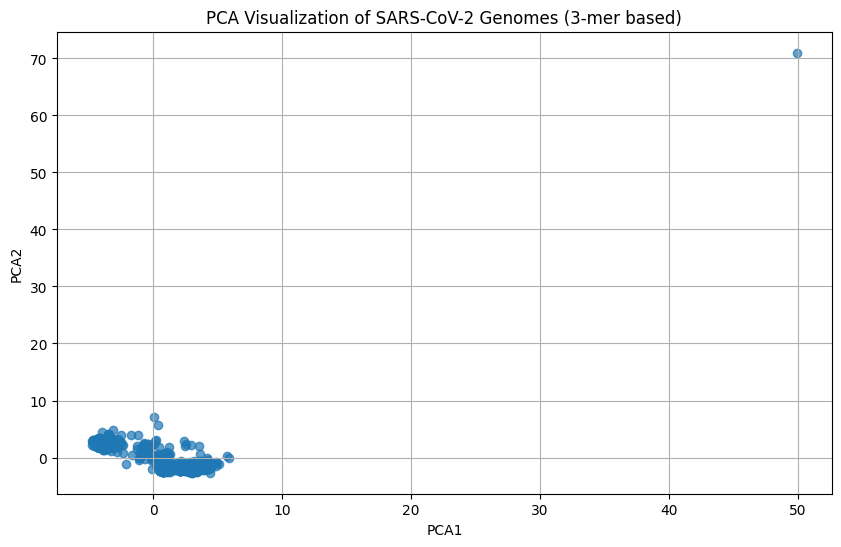

In [9]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Run PCA on the k-mer frequency matrix
pca = PCA(n_components=2)
pca_result = pca.fit_transform(kmer_freq_df)

# Add the PCA results to your dataframe
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['PCA1'], df['PCA2'], alpha=0.7)
plt.title('PCA Visualization of SARS-CoV-2 Genomes (3-mer based)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


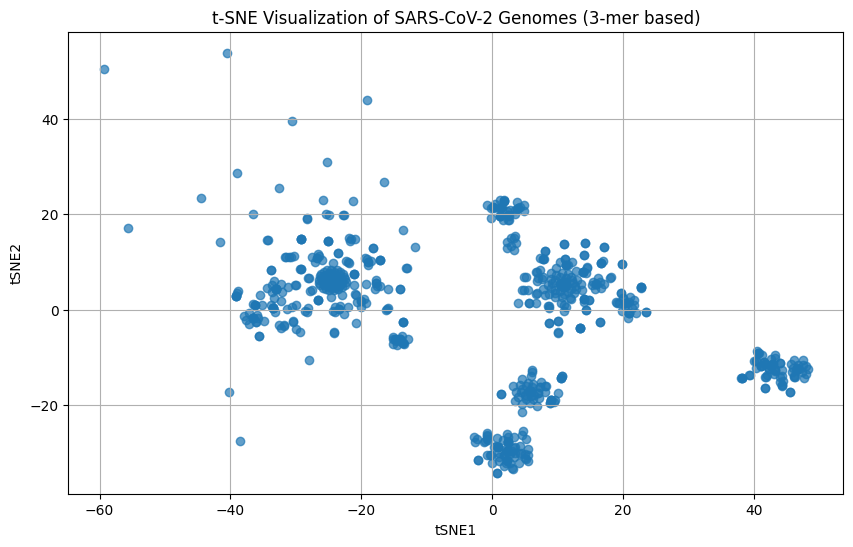

In [10]:
from sklearn.manifold import TSNE

# Run t-SNE on the k-mer frequency matrix
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
tsne_result = tsne.fit_transform(kmer_freq_df)

# Add t-SNE results to the dataframe
df['tSNE1'] = tsne_result[:, 0]
df['tSNE2'] = tsne_result[:, 1]

# Plot the t-SNE result
plt.figure(figsize=(10, 6))
plt.scatter(df['tSNE1'], df['tSNE2'], alpha=0.7)
plt.title('t-SNE Visualization of SARS-CoV-2 Genomes (3-mer based)')
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.grid(True)
plt.show()
